In [35]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import copy

conjunto_datos_original = datasets.load_iris()
x = conjunto_datos_original.data
y = conjunto_datos_original.target

df = pd.DataFrame(data=x, columns=conjunto_datos_original.feature_names)

# Mostrar descripción, forma y todos los registros
print('Descripción del dataset Iris:\n')
print(conjunto_datos_original.DESCR)
print('\nDimensiones:', df.shape)
display(df)

Descripción del dataset Iris:

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Media de cada característica (aproximadamente 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Varianza de cada característica (aproximadamente 1): [1. 1. 1. 1.]


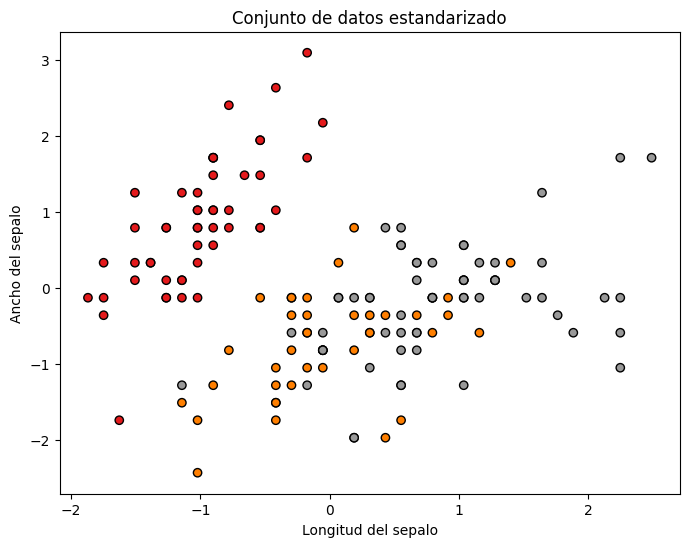

In [36]:
from sklearn.preprocessing import StandardScaler
conjunto_datos_estandarizado = copy.deepcopy(conjunto_datos_original)
conjunto_datos_estandarizado.data = StandardScaler().fit_transform(x)

# Verificar que la estandarización se hizo correctamente
print("Media de cada característica (aproximadamente 0):", conjunto_datos_estandarizado.data.mean(axis=0))
print("Varianza de cada característica (aproximadamente 1):", conjunto_datos_estandarizado.data.var(axis=0))

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(conjunto_datos_estandarizado.data[:, 0], conjunto_datos_estandarizado.data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Conjunto de datos estandarizado")
plt.savefig('report/images/estandarizado_scatter.png', dpi=300, bbox_inches='tight')

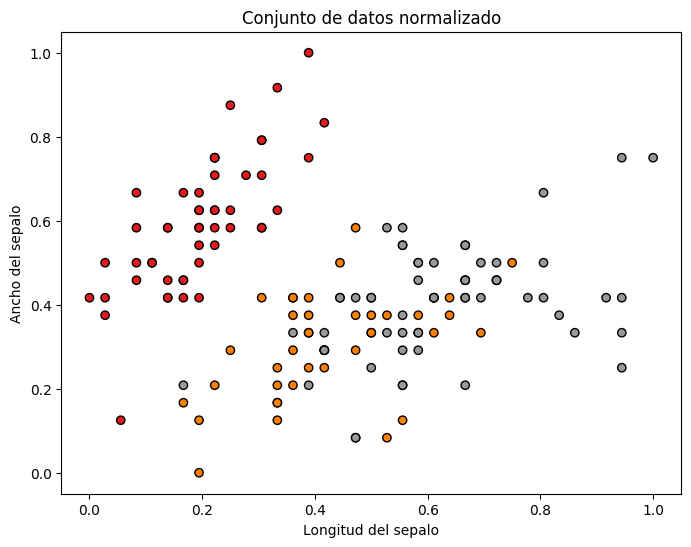

In [37]:
conjunto_datos_normalizado = copy.deepcopy(conjunto_datos_original)
conjunto_datos_normalizado.data = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(conjunto_datos_normalizado.data[:, 0], conjunto_datos_normalizado.data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Conjunto de datos normalizado")
plt.savefig('report/images/normalizado_scatter.png', dpi=300, bbox_inches='tight')

Número de componentes: 2
Proporción de varianza explicada: [0.92461872 0.05306648]


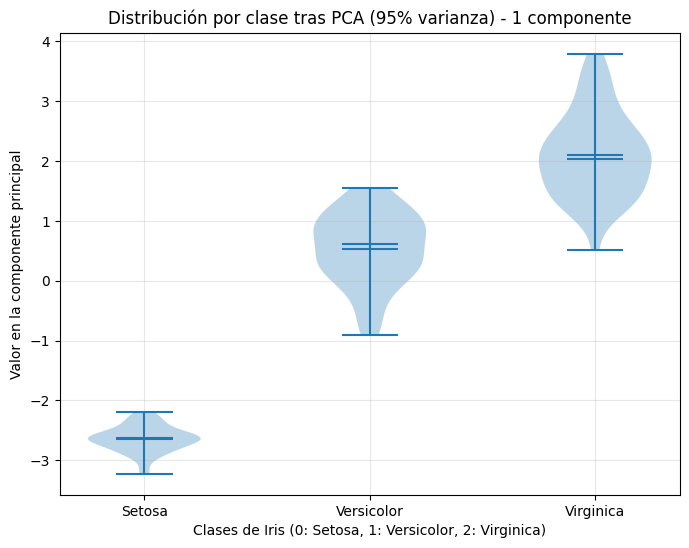

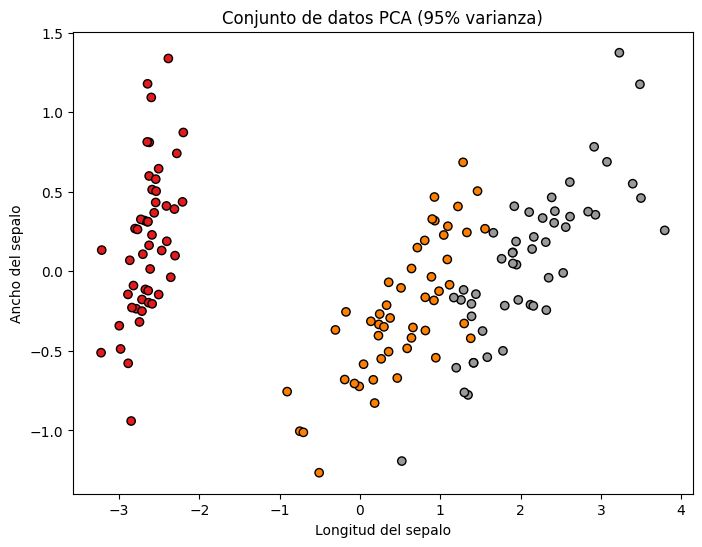

In [38]:
from sklearn.decomposition import PCA
conjunto_datos_originalPCA95 = copy.deepcopy(conjunto_datos_original)
pca = PCA(0.95)
conjunto_datos_originalPCA95.data = pca.fit_transform(conjunto_datos_originalPCA95.data)

print("Número de componentes:", pca.n_components_)
print("Proporción de varianza explicada:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_originalPCA95.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase tras PCA (95% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/original_pca95_violin.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(conjunto_datos_originalPCA95.data[:, 0], conjunto_datos_originalPCA95.data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Conjunto de datos PCA (95% varianza)")
plt.savefig('report/images/original_pca95_scatter.png', dpi=300, bbox_inches='tight')


Número de componentes: 1
Proporción de varianza explicada: [0.92461872]


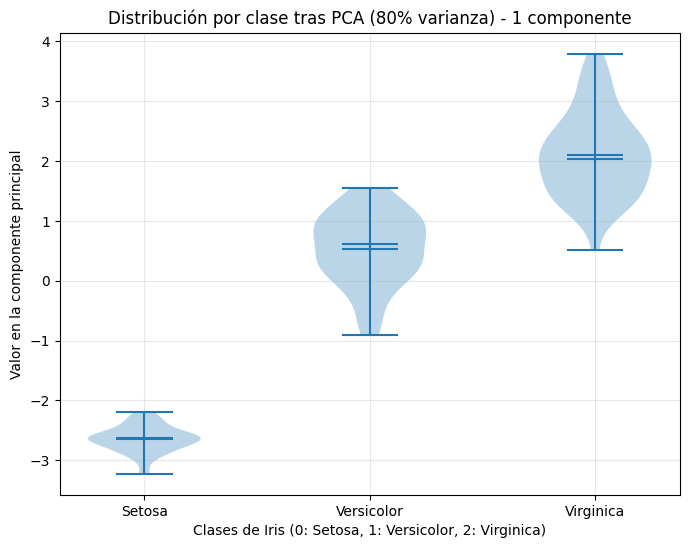

In [39]:
conjunto_datos_originalPCA80 = copy.deepcopy(conjunto_datos_original)
pca = PCA(0.80)
conjunto_datos_originalPCA80.data = pca.fit_transform(conjunto_datos_originalPCA80.data)

print("Número de componentes:", pca.n_components_)
print("Proporción de varianza explicada:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_originalPCA80.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase tras PCA (80% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/original_pca80_violin.png', dpi=300, bbox_inches='tight')
plt.show()




['pca0' 'pca1']
[0.72962445 0.22850762]
2


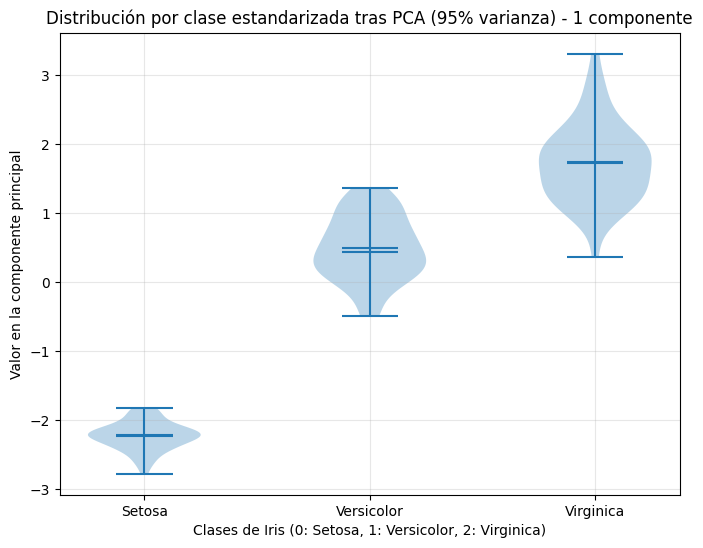

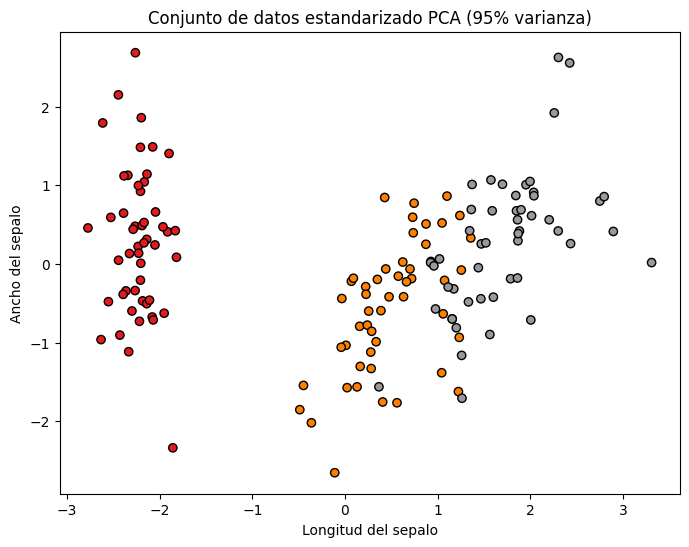

In [40]:
conjunto_datos_estandarizadoPCA95 = copy.deepcopy(conjunto_datos_estandarizado)
pca = PCA(0.95)
conjunto_datos_estandarizadoPCA95.data = pca.fit_transform(conjunto_datos_estandarizadoPCA95.data)

print(pca.get_feature_names_out())
print(pca.explained_variance_ratio_)
print(pca.n_components_)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_estandarizadoPCA95.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase estandarizada tras PCA (95% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/std_pca95_violin.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(conjunto_datos_estandarizadoPCA95.data[:, 0], conjunto_datos_estandarizadoPCA95.data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Conjunto de datos estandarizado PCA (95% varianza)")
plt.savefig('report/images/std_pca95_scatter.png', dpi=300, bbox_inches='tight')

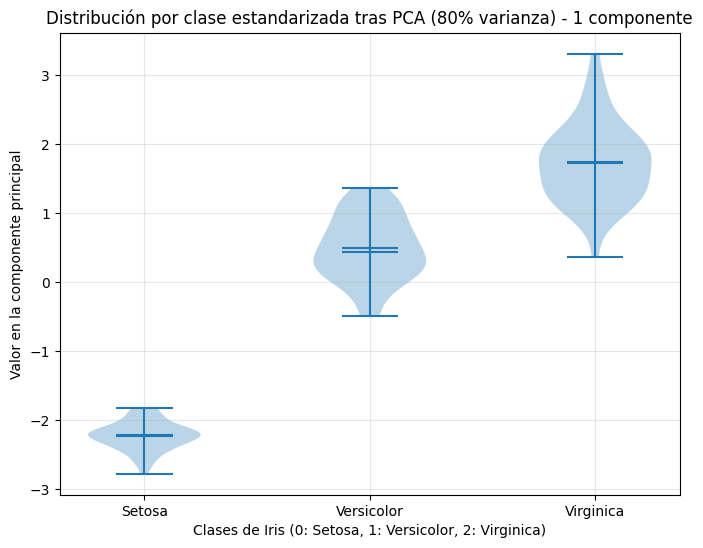

In [41]:
conjunto_datos_estandarizadoPCA80 = copy.deepcopy(conjunto_datos_estandarizado)
pca = PCA(0.80)
conjunto_datos_estandarizadoPCA80.data = pca.fit_transform(conjunto_datos_estandarizadoPCA80.data)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_estandarizadoPCA80.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase estandarizada tras PCA (80% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/std_pca80_violin.png', dpi=300, bbox_inches='tight')
plt.show()

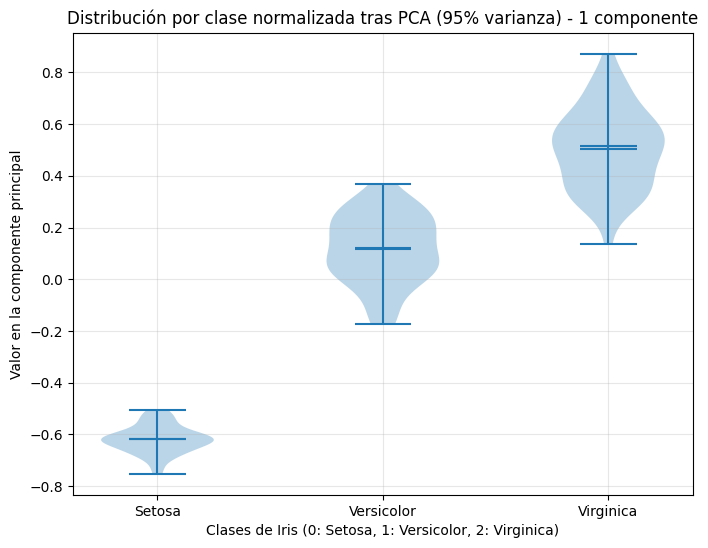

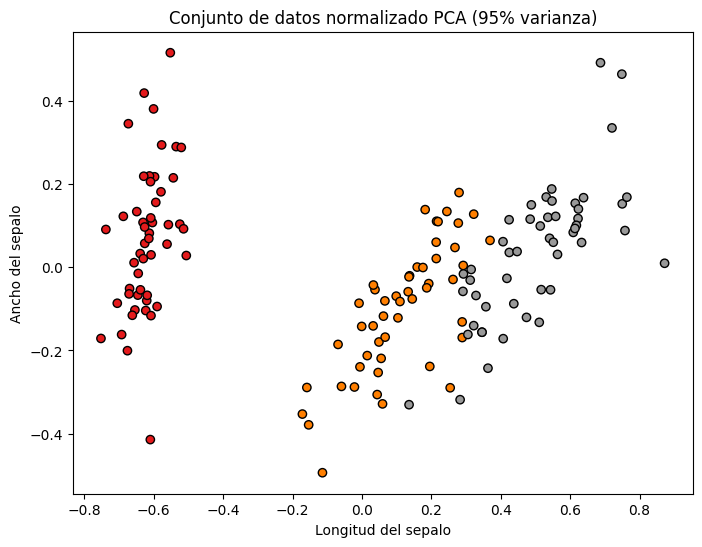

In [42]:
conjunto_datos_normalizadoPCA95 = copy.deepcopy(conjunto_datos_normalizado)
pca = PCA(0.95)
conjunto_datos_normalizadoPCA95.data = pca.fit_transform(conjunto_datos_normalizadoPCA95.data)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_normalizadoPCA95.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase normalizada tras PCA (95% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/norm_pca95_violin.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(conjunto_datos_normalizadoPCA95.data[:, 0], conjunto_datos_normalizadoPCA95.data[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Conjunto de datos normalizado PCA (95% varianza)")
plt.savefig('report/images/norm_pca95_scatter.png', dpi=300, bbox_inches='tight')

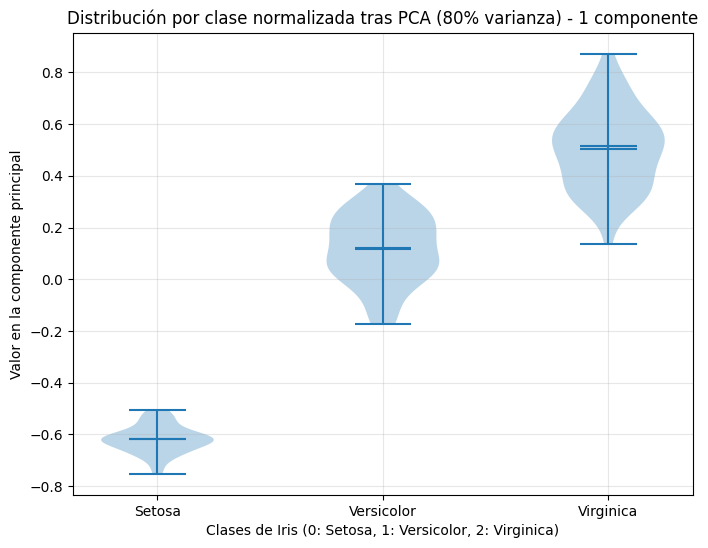

In [43]:
conjunto_datos_normalizadoPCA80 = copy.deepcopy(conjunto_datos_normalizado)
pca = PCA(0.80)
conjunto_datos_normalizadoPCA80.data = pca.fit_transform(conjunto_datos_normalizadoPCA80.data)

plt.figure(figsize=(8, 6))
data_by_class = [conjunto_datos_normalizadoPCA80.data[y == i, 0] for i in range(3)]
plt.violinplot(data_by_class, showmeans=True, showmedians=True)
plt.xlabel("Clases de Iris (0: Setosa, 1: Versicolor, 2: Virginica)")
plt.ylabel("Valor en la componente principal")
plt.title("Distribución por clase normalizada tras PCA (80% varianza) - 1 componente")
plt.grid(True, alpha=0.3)
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('report/images/norm_pca80_violin.png', dpi=300, bbox_inches='tight')
plt.show()

## Validación Cruzada

Implementación de validación cruzada estratificada con k=5 pliegues. Esta técnica divide el conjunto de datos en 5 partes iguales, manteniendo la misma proporción de clases en cada pliegue (estratificación). En cada iteración una parte se usa como conjunto de **test** (20% de los datos) y las otras 4 partes se usan como conjunto de entrenamiento (80% de los datos). Esto permite evaluar modelos de forma más robusta, utilizando todos los datos tanto para entrenamiento como para prueba.

In [44]:
# Procedemos a realizar una validacion cruzada de k=5 para cada uno de los conjuntos de datos generados anteriormente de forma manual.
import numpy as np

def validacion_cruzada_estratificada(X, y, k=5):
    
    n_samples = len(y)
    clases = np.unique(y)
    folds = [[] for _ in range(k)]
    
    for clase in clases:
        indices_clase = np.where(y == clase)[0]
        n_muestras_clase = len(indices_clase)
        
        muestras_por_fold = n_muestras_clase // k
        
        for i in range(k):
            inicio = i * muestras_por_fold
            fin = (i + 1) * muestras_por_fold if i < k - 1 else n_muestras_clase
            folds[i].extend(indices_clase[inicio:fin])
    
    folds = [np.array(sorted(fold)) for fold in folds]
    
    particiones = []
    for i in range(k):
        indices_prueba = folds[i]
        
        indices_entrenamiento = np.concatenate([folds[j] for j in range(k) if j != i])
        indices_entrenamiento = np.sort(indices_entrenamiento)
        
        particiones.append((indices_entrenamiento, indices_prueba))
    
    return particiones




## Generación de Archivos CSV para Validación Cruzada.

Generamos archivos CSV de entrenamiento y test para cada iteración de la validación cruzada, aplicados a todos los conjuntos de datos:

Conjuntos de datos:
- Original (sin transformación).
- Estandarizado (`std`).
- Normalizado (`norm`).
- Original con PCA 95% y 80% (`original_PCA95`, `original_PCA80`).
- Estandarizado con PCA 95% y 80% (`std_PCA95`, `std_PCA80`).
- Normalizado con PCA 95% y 80% (`norm_PCA95`, `norm_PCA80`).

Nomenclatura de los archivos generados:
- Para el conjunto de entrenamiento: `training{iteracion}_{sufijo}.csv`.
- Para el conjunto de test: `test{iteracion}_{sufijo}.csv`.

Por ejemplo, `training3_norm_PCA95.csv` contiene el conjunto de entrenamiento normalizado con PCA 95% de la iteración 3.

In [ ]:
import os

def generar_archivos_validacion_cruzada(X, y, particiones, nombre_conjunto, output_dir='cross_validation_data'):
    os.makedirs(output_dir, exist_ok=True)
    k = len(particiones)
    
    print(f"Generando archivos para conjunto '{nombre_conjunto}' ({k} iteraciones)...")
    
    for iteracion in range(k):
        indices_train, indices_test = particiones[iteracion]
        
        X_train = X[indices_train]
        y_train = y[indices_train]
        X_test = X[indices_test]
        y_test = y[indices_test]
        
        # Generar nombres de columnas genéricos
        n_features = X.shape[1]
        columnas = [f'feature_{i+1}' for i in range(n_features)]
        
        # Crear y guardar conjunto de entrenamiento
        df_train = pd.DataFrame(X_train, columns=columnas)
        df_train['target'] = y_train
        df_train.to_csv(f'{output_dir}/training{iteracion+1}_{nombre_conjunto}.csv', index=False)
        
        # Crear y guardar conjunto de test
        df_test = pd.DataFrame(X_test, columns=columnas)
        df_test['target'] = y_test
        df_test.to_csv(f'{output_dir}/test{iteracion+1}_{nombre_conjunto}.csv', index=False)
    
    print(f"Completado: {k*2} archivos generados\n")


# Generar particiones de validación cruzada
k = 5
particiones = validacion_cruzada_estratificada(x, y, k=k)

print(f"Validación cruzada con k={k} configurada")
print(f"Total de muestras: {len(y)}")
print(f"Muestras por fold: {len(y) // k}\n")

# Generar archivos para todos los conjuntos de datos
generar_archivos_validacion_cruzada(conjunto_datos_original.data, y, particiones, 'original')
generar_archivos_validacion_cruzada(conjunto_datos_estandarizado.data, y, particiones, 'std')
generar_archivos_validacion_cruzada(conjunto_datos_normalizado.data, y, particiones, 'norm')
generar_archivos_validacion_cruzada(conjunto_datos_originalPCA95.data, y, particiones, 'original_PCA95')
generar_archivos_validacion_cruzada(conjunto_datos_originalPCA80.data, y, particiones, 'original_PCA80')
generar_archivos_validacion_cruzada(conjunto_datos_estandarizadoPCA95.data, y, particiones, 'std_PCA95')
generar_archivos_validacion_cruzada(conjunto_datos_estandarizadoPCA80.data, y, particiones, 'std_PCA80')
generar_archivos_validacion_cruzada(conjunto_datos_normalizadoPCA95.data, y, particiones, 'norm_PCA95')
generar_archivos_validacion_cruzada(conjunto_datos_normalizadoPCA80.data, y, particiones, 'norm_PCA80')

print(f"Proceso completado: 9 conjuntos x {k} iteraciones x 2 archivos = {9*k*2} archivos CSV generados")

Validación cruzada con k=5 configurada
Total de muestras: 150
Muestras por fold: 30

Generando archivos para conjunto 'original' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'std' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'norm' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'original_PCA95' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'original_PCA80' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'std_PCA95' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'std_PCA80' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'norm_PCA95' (5 iteraciones)...
Completado: 10 archivos generados

Generando archivos para conjunto 'norm_PCA80' (5 iteraciones)...
Completado: 10 archivos generados

Proceso completado: 9 co